In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = {'age': [22, 30, 24, 27, 31, 19, 21, 29], 
        'gender': ['female', 'unknown', 'female', 'male', 'female', 'unknown', 'female', 'male']}
df = pd.DataFrame(data)
df

,age,gender
0,22,female
1,30,unknown
2,24,female
3,27,male
4,31,female
5,19,unknown
6,21,female
7,29,male


## OneHot Encoding
- Nominal Category -  No ordering

In [6]:
df['gender_male'] = df['gender'].apply(lambda x: 1 if x == 'male' else 0)
df['gender_female'] = df['gender'].apply(lambda x: 1 if x == 'female' else 0)
df['gender_unknown'] = df['gender'].apply(lambda x: 1 if x == 'unknown' else 0)

In [7]:
df

,age,gender,gender_male,gender_female,gender_unknown
0,22,female,0,1,0
1,30,unknown,0,0,1
2,24,female,0,1,0
3,27,male,1,0,0
4,31,female,0,1,0
5,19,unknown,0,0,1
6,21,female,0,1,0
7,29,male,1,0,0


In [16]:
df.corr()

,age,male,female,unknown
age,1.000000,0.325350,-0.114960,-0.119961
male,0.325350,1.000000,-0.487950,-0.218218
female,-0.114960,-0.487950,1.000000,-0.745356
unknown,-0.119961,-0.218218,-0.745356,1.000000


In [19]:
df = pd.get_dummies(data=df, columns=['gender'])

,age,male,female,unknown,gender_female,gender_male,gender_unknown
0,22,0,1,0,1,0,0
1,30,0,0,1,0,0,1
2,24,0,1,0,1,0,0
3,27,0,1,0,1,0,0
4,31,0,1,0,1,0,0
5,19,0,0,1,0,0,1
6,21,0,1,0,1,0,0
7,29,1,0,0,0,1,0


#### Dummy cols => categories - 1

## Ordinal Encoding

In [8]:
df['position'] = ['1st', '3rd', '5th', '2nd', '8th', '6th', '4th', '7th']

In [6]:
df

,age,gender,male,female,unknown,position
0,22,female,0,1,0,1st
1,30,unknown,0,0,1,3rd
2,24,female,0,1,0,5th
3,27,male,1,0,0,2nd
4,31,female,0,1,0,8th
5,19,unknown,0,0,1,6th
6,21,female,0,1,0,4th
7,29,male,1,0,0,7th


In [7]:
df['position_encoded'] = df['position'].apply(lambda x: int(x[0]))

In [8]:
df

,age,gender,male,female,unknown,position,position_encoded
0,22,female,0,1,0,1st,1
1,30,unknown,0,0,1,3rd,3
2,24,female,0,1,0,5th,5
3,27,male,1,0,0,2nd,2
4,31,female,0,1,0,8th,8
5,19,unknown,0,0,1,6th,6
6,21,female,0,1,0,4th,4
7,29,male,1,0,0,7th,7


In [51]:
df.dtypes

age                  int64
gender              object
male                 int64
female               int64
unknown              int64
position            object
position_encoded     int64
dtype: object

## Log Transformation
To make the data more normaly distributed.

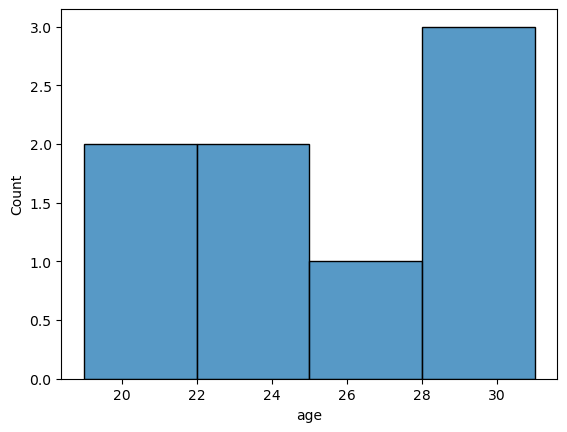

In [9]:
sns.histplot(data=df, x='age')
plt.show()

In [10]:
df['age'] = df['age'].apply(lambda x: np.log(x))

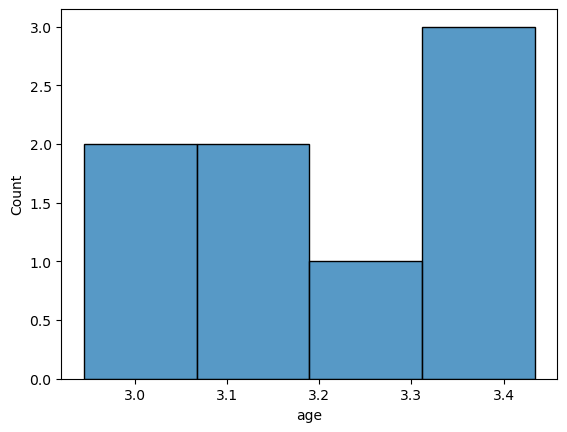

In [11]:
sns.histplot(data=df, x='age')
plt.show()

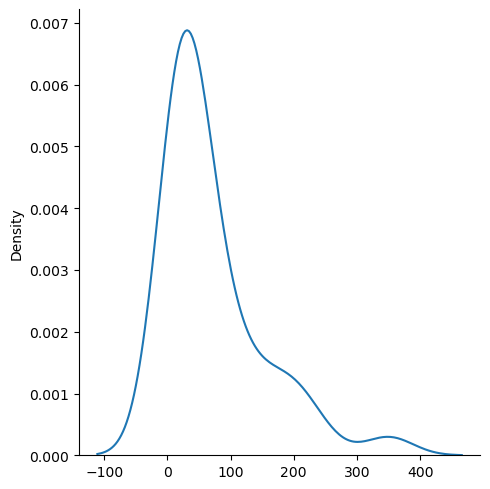

In [12]:
x_data = [5,15,21,23,18,45,55,64,71,18,207,105,117, 151,176,18,12,11,15, 19,33,81,18,25, 57,37,121, 350,191, 233, 18,27,31,42,59]
sns.displot(x_data, kind='kde')
plt.show()

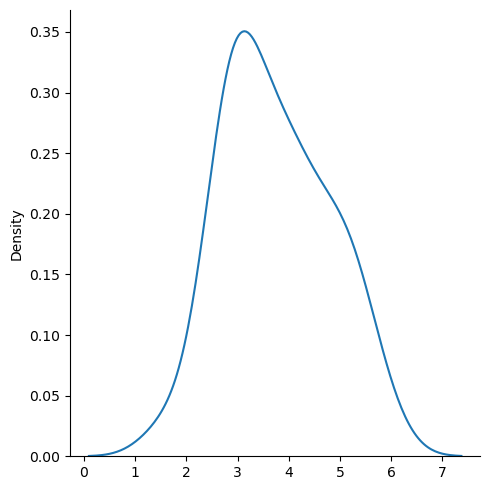

In [13]:
x_data_log = np.log(x_data)
sns.displot(x_data_log, kind='kde')
plt.show()

## Min-Max Normalization
- Normalize the age column
x -min / max - min

In [40]:
df['age_scaled(min-max)'] = df['age'].apply(lambda x: (x - min(df['age'])) / (max(df['age']) - min(df['age'])))

In [41]:
df

,age,gender,male,female,unknown,position,position_encoded,age_scaled(min-max)
0,22,male,1,0,0,1st,1,0.250000
1,30,unknown,0,0,1,3rd,3,0.916667
2,24,female,0,1,0,5th,5,0.416667
3,27,male,1,0,0,2nd,2,0.666667
4,31,female,0,1,0,8th,8,1.000000
5,19,unknown,0,0,1,6th,6,0.000000
6,21,female,0,1,0,4th,4,0.166667
7,29,male,1,0,0,7th,7,0.833333


## Standardization / z-score Normalization
x - mean / sd

In [105]:
df['age_scaled(Standardization)'] = df['age'].apply(lambda x: (x - df['age'].mean()) / np.std(df['age']))

In [106]:
df

,age,gender,male,female,position,position_encoded,age_scaled(min-max),age_scaled(Standardization)
0,3.091042,male,1,0,1st,1,0.299467,-0.755934
1,3.401197,female,0,1,3rd,3,0.933020,1.068568
2,3.178054,female,0,1,5th,5,0.477205,-0.244085
3,3.295837,male,1,0,2nd,2,0.717800,0.448780
4,3.433987,female,0,1,8th,8,1.000000,1.261456
5,2.944439,male,1,0,6th,6,0.000000,-1.618336
6,3.044522,female,0,1,4th,4,0.204440,-1.029590
7,3.367296,male,1,0,7th,7,0.863770,0.869141


## Robust scaler
x - median / Interquartile range